June 2nd, 2025


## QLT electrostatic secondary instabilities (perpendicular)
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [4]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.testperp import dydt 

In [6]:
# import for plotting purposes
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Electrostatic perpendicular QLT + reduced dispersion relation equations


We proceed to normalize the physical quantities as follows:
\begin{align*}
   t &\coloneqq t^{d}|\Omega_{ce}|, \qquad \omega \coloneqq \frac{\omega^{d}}{|\Omega_{ce}|}, \qquad k_{\perp} \coloneqq d_{e} k_{\perp}^{d}, \qquad \omega_{pe} \coloneqq \frac{\omega_{pe}^{d}}{|\Omega_{ce}|}, \qquad \alpha_{\perp c} \coloneqq \frac{\alpha_{\perp c}^{d}}{d_{e} |\Omega_{ce}|}, \qquad  \mathcal{E}_{E}(k_{\perp}, t) \coloneqq \frac{|\delta \vec{\hat{E}}(k_{\perp}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \\
   T_{\perp c} &\coloneqq \frac{T_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e}}, \qquad n_{c} \coloneqq \frac{n_{c}^{d}}{n_{e}}, \qquad \mathcal{E}_{B}(k_{\|}, t) \coloneqq \frac{|\delta \vec{\hat{B}}(k_{\|}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \qquad K_{\perp c} \coloneqq \frac{K_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e} n_{e}},
\end{align*}
leading to
\begin{align*}
    \frac{\mathrm{d} K_{\perp c}(t)}{\mathrm{d} t} &=  -\frac{1}{2\pi} \int_{0}^{\infty} \mathrm{d} k_{\perp} \mathcal{E}_{E}(k_{\perp}, t) \mathrm{Im} \left\{\omega - \frac{\omega}{k_{\perp}^2} \frac{\omega_{pi}^2}{\alpha_{i}^2} J^2_{m*}\left(\frac{k_{\perp} |V_{Dc}|}{ \omega_{0}}\right) Z{'}\left(\frac{\omega + m_{*} \omega_{0}}{k_{\perp} \alpha_{i}}\right)\right\}\\
    \partial_{t} \mathcal{E}_{E}(k_{\perp}, t)  &= 2 \mathrm{Im}\{\omega\}  \mathcal{E}_{E}(k_{\perp}, t) \\
    \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t) &= - \frac{2}{\frac{\omega_{0}^2}{k_{\|0}^2\omega_{pe}^2} + 1} \int_{0}^{\infty} \mathrm{d} k_{\perp} \mathcal{E}_{E}(k_{\perp}, t) \mathrm{Im} \left\{ \frac{\omega}{k_{\perp}^2} \frac{\omega_{pi}^2}{\alpha_{i}^2} J^2_{m*}\left(\frac{k_{\perp} |V_{Dc}|}{ \omega_{0}}\right) Z{'}\left(\frac{\omega + m_{*} \omega_{0}}{k_{\perp} \alpha_{i}}\right)\right\}\\
    \frac{\mathrm{d} |V_{Dc}(t)|^2}{\mathrm{d} t} &= \frac{1}{4\pi} \left[\frac{\omega_{0}}{k_{\|0}}\frac{1}{\omega_{0} -1} \right]^2 \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t)\\
    k_{\perp}^2 - 4 n_{c} \frac{\omega_{pe}^2}{\alpha_{\perp c}^2} &\sum_{n=1}^{\infty}\exp(-\lambda_{c}) I_{n}(\lambda_{c}) \left[ \frac{n^2}{\omega^2 - n^2 }\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{m^{*}}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega + m^{*}\omega_{0}}{k_{\perp} \alpha_{i}}\right) \\
    \lambda_{c} &= \frac{k_{\perp}^2 \alpha_{\perp c}^2}{2} 
\end{align*}

In [15]:
# normalization 
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
n_c = 4/5 # n^e_0
omega_0 = 0.5 # Omega_ce
k_0 = 1 # d_e
dB0 = 4*np.pi *  1 * 1e-5 # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

omega_pe = 4 # Omgea_{ce}
alpha_perp_c = 0.0079 # d_e x Omega_ce
alpha_i =  0.0079 / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * 0.0079 # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 5e-10
K0 = (alpha_perp_c**2 / 2) * n_c 
T0 = (alpha_perp_c**2 / 2) 

# k vector
k_vec = np.linspace(176, 220, 30)
dk = np.abs(k_vec[1] - k_vec[0])

# max time 
t_max = 600

In [16]:
dE_init = E0 * np.ones(len(k_vec))

# simulate 
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max], 
                                   y0=np.concatenate(([K0], [T0], [dB0], [v_0**2], dE_init)), 
                                   args=(k_vec, omega_pe, omega_pi, k_0, alpha_i, n_c, dk, omega_0, "perp_gamma"),
                                   atol=1e-10, rtol=1e-10, method='Radau')

t =  0.0
max gamma =  0.007080818738011543
t =  371.7160488871369
max gamma =  0.006980189048046147
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818589114822
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818540881335
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.007080818738011543
t =  0.0
max gamma =  0.0070808187380115

In [17]:
len(result.t)

27

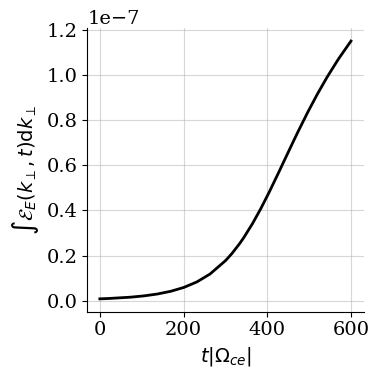

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))
potential_energy = np.sum(result.y[4:, :], axis=0)*dk/(8*np.pi)
ax.plot(result.t, potential_energy, color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/perp/perp_potential_energy.png", dpi=300, bbox_inches='tight')

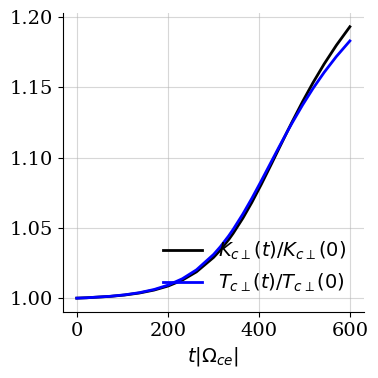

In [19]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="black", linewidth=2, label=r"$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(result.t, result.y[1, :]/result.y[1, 0], color="blue", linewidth=2, label="$T_{c\perp}(t)/T_{c\perp}(0)$")

legend = ax.legend(loc='lower right', ncols=1, fancybox=False, shadow=False, fontsize=14)
legend.get_frame().set_alpha(0)
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/perp/perp_kinetic_energy.png", dpi=300, bbox_inches='tight')

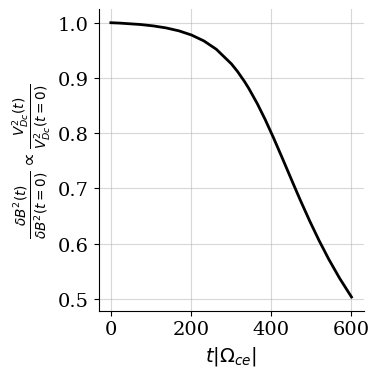

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[2, :]/result.y[2, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)} \propto \frac{V_{Dc}^2(t)}{V_{Dc}^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/secondary_QLT/perp/perp_magnetic_energy.png", dpi=300, bbox_inches='tight')

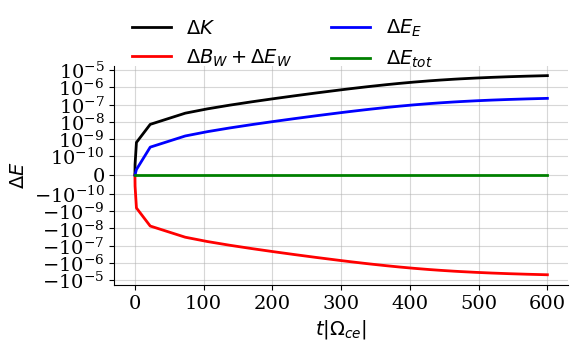

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
kinetic_energy = result.y[0, :]
potential_energy = np.sum(result.y[4:, :], axis=0)*dk/4/np.pi
magnetic_energy = (1 + (omega_0/k_0/omega_pe)**2) * result.y[2, :]/4/np.pi 
total_energy = kinetic_energy + magnetic_energy + potential_energy 

ax.plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax.plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W} + \Delta E_{W}$")
ax.plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax.plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax.set_yscale("symlog", linthresh=1e-10)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\Delta E$')

legend = ax.legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5) 
plt.tight_layout()

plt.savefig("../figs/secondary_QLT/perp/perp_conservation_of_energy.png", dpi=300, bbox_inches='tight')

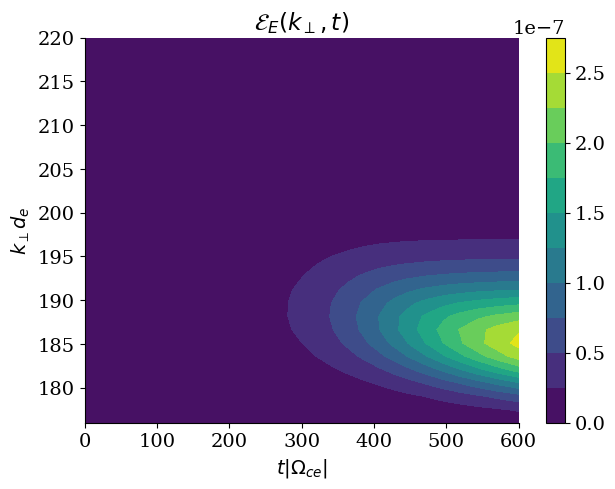

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.contourf(result.t, k_vec, result.y[4:], cmap="viridis",  levels=10)
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$k_{\perp} d_{e}$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}_{E}(k_{\perp}, t)$")
plt.savefig("../figs/secondary_QLT/perp/electric_energy_spectrum.png", dpi=300, bbox_inches='tight')